In [12]:
%matplotlib inline


# Spectral clustering for image segmentation


In this example, an image with connected circles is generated and
spectral clustering is used to separate the circles.

In these settings, the :ref:`spectral_clustering` approach solves the problem
know as 'normalized graph cuts': the image is seen as a graph of
connected voxels, and the spectral clustering algorithm amounts to
choosing graph cuts defining regions while minimizing the ratio of the
gradient along the cut, and the volume of the region.

As the algorithm tries to balance the volume (ie balance the region
sizes), if we take circles with different sizes, the segmentation fails.

In addition, as there is no useful information in the intensity of the image,
or its gradient, we choose to perform the spectral clustering on a graph
that is only weakly informed by the gradient. This is close to performing
a Voronoi partition of the graph.

In addition, we use the mask of the objects to restrict the graph to the
outline of the objects. In this example, we are interested in
separating the objects one from the other, and not from the background.


In [13]:
print(__doc__)

# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

Automatically created module for IPython interactive environment


In [14]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

4 circles


(100, 100)
[[ 1.10806749  0.58012168  0.90035444 ...,  1.17518041  0.85833671
   0.93192896]
 [ 0.98603936  0.95390223  0.95326768 ...,  0.93609092  0.84281879
   0.91646941]
 [ 1.05792024  1.2103045   1.10763627 ...,  0.89396321  0.8440344
   1.11727191]
 ..., 
 [ 0.657019    1.1320916   1.03735121 ...,  1.15190079  1.01340759
   0.86944502]
 [ 1.41625407  0.86051974  0.95970072 ...,  0.98462412  1.11386369
   1.03091908]
 [ 1.32878116  1.36609802  1.48614833 ...,  0.90297113  1.32280901
   0.8674881 ]]
[ 0.01518264  0.09485347  0.22154247 ...,  1.6697585   2.04520289
  2.02193714]


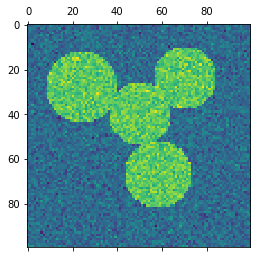

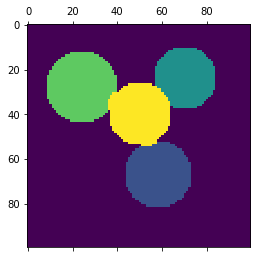

In [15]:
img = circle1 + circle2 + circle3 + circle4
# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
print(img.shape)
img += 1 + 0.2 * np.random.randn(*img.shape)
print(img)
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

print(graph.data)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

2 circles


(6760,)


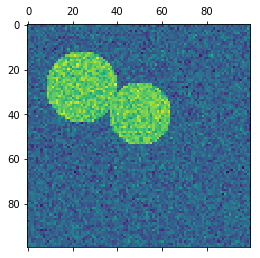

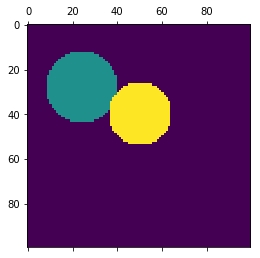

In [22]:
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)
graph = image.img_to_graph(img, mask=mask)
print(graph.data.shape)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()